In [43]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import time
import matplotlib.pyplot as plt

In [44]:
pd.set_option('display.max_columns', None)
movies = pd.read_csv("movies2.csv")
tags = pd.read_csv("tags2.csv")
ratings = pd.read_csv("ratings2.csv")
links = pd.read_csv("links2.csv")

In [45]:
movies

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy
...,...,...,...
9737,193581,Black Butler: Book of the Atlantic (2017),Action|Animation|Comedy|Fantasy
9738,193583,No Game No Life: Zero (2017),Animation|Comedy|Fantasy
9739,193585,Flint (2017),Drama
9740,193587,Bungo Stray Dogs: Dead Apple (2018),Action|Animation


In [46]:
movies[movies["genres"] == "(no genres listed)"]

,movieId,title,genres
8517,114335,La cravate (1957),(no genres listed)
8684,122888,Ben-hur (2016),(no genres listed)
8687,122896,Pirates of the Caribbean: Dead Men Tell No Tal...,(no genres listed)
8782,129250,Superfast! (2015),(no genres listed)
8836,132084,Let It Be Me (1995),(no genres listed)
8902,134861,Trevor Noah: African American (2013),(no genres listed)
9033,141131,Guardians (2016),(no genres listed)
9053,141866,Green Room (2015),(no genres listed)
9070,142456,The Brand New Testament (2015),(no genres listed)
9091,143410,Hyena Road,(no genres listed)


In [47]:
movies["genres"].value_counts()

Drama                                       1053
Comedy                                       946
Comedy|Drama                                 435
Comedy|Romance                               363
Drama|Romance                                349
                                            ... 
Action|Adventure|Comedy|Crime|Fantasy          1
Adventure|Children|Comedy|Romance|Sci-Fi       1
Drama|Romance|Sci-Fi|Thriller                  1
Comedy|War|Western                             1
Action|Children|Sci-Fi|IMAX                    1
Name: genres, Length: 951, dtype: int64

In [48]:
movies.describe()

,movieId
count,9742.000000
mean,42200.353623
std,52160.494854
min,1.000000
25%,3248.250000
50%,7300.000000
75%,76232.000000
max,193609.000000


----------------------------------------------------------------------------------------------------

In [49]:
def convert_timestamp(data):
    day,year,hour,month,day_of_week = [],[],[],[],[]
    for i in data["timestamp"]:
        date = time.gmtime(i)
        day.append(date[2])
        year.append(date[0])
        hour.append(date[3])
        month.append(date[1])
        day_of_week.append(date[6])
    data["day"] = day
    data["month"] = month
    data["year"] = year
    data["hour"] = hour
    data["week day"] = day_of_week
    del data["timestamp"]
    return data

In [50]:
tags = convert_timestamp(tags)
tags

,userId,movieId,tag,day,month,year,hour,week day
0,2,60756,funny,24,10,2015,19,5
1,2,60756,Highly quotable,24,10,2015,19,5
2,2,60756,will ferrell,24,10,2015,19,5
3,2,89774,Boxing story,24,10,2015,19,5
4,2,89774,MMA,24,10,2015,19,5
...,...,...,...,...,...,...,...,...
3678,606,7382,for katie,11,2,2007,22,6
3679,606,7936,austere,8,3,2007,22,3
3680,610,3265,gun fu,3,5,2017,20,2
3681,610,3265,heroic bloodshed,3,5,2017,20,2


<AxesSubplot:title={'center':'movies Watched by Hour'}>

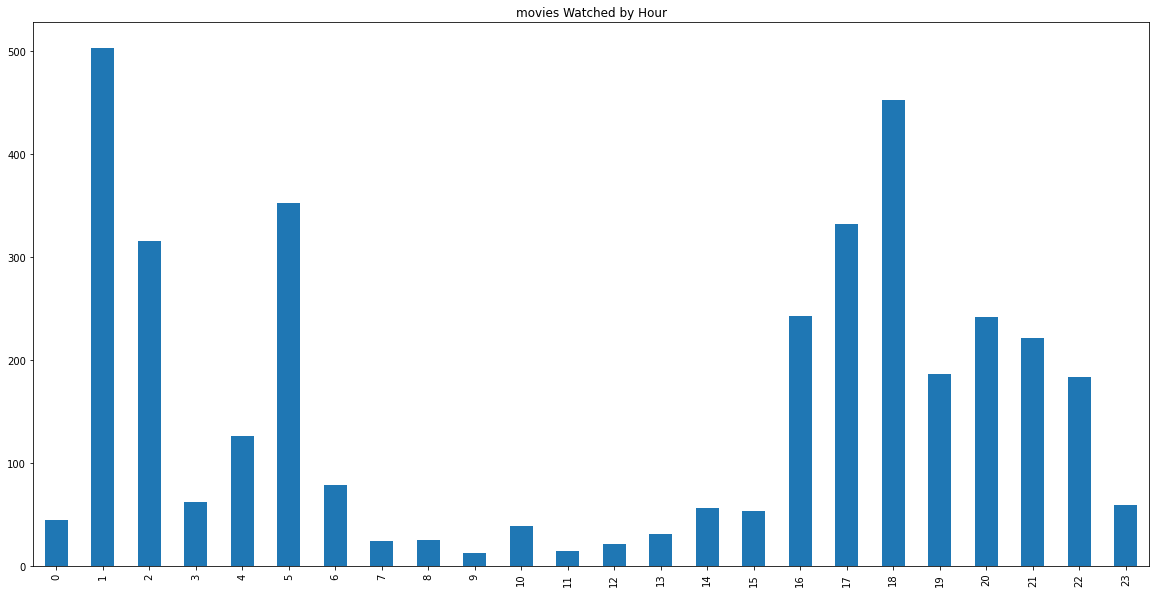

In [51]:
movies_by_hour = tags['hour'].value_counts()

movies_by_hour = movies_by_hour.sort_index()


movies_by_hour.plot(kind='bar', figsize=(20,10), title='movies Watched by Hour')

<AxesSubplot:title={'center':'movies Watched by Day'}>

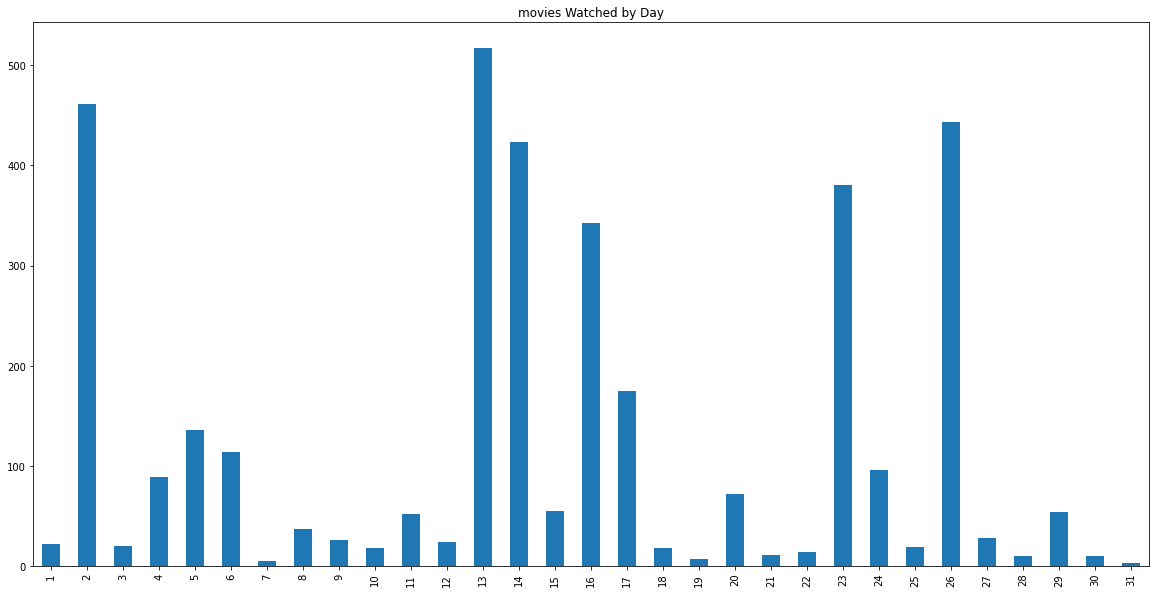

In [52]:
movies_by_day = tags['day'].value_counts()

movies_by_day = movies_by_day.sort_index()


movies_by_day.plot(kind='bar', figsize=(20,10), title='movies Watched by Day')

<AxesSubplot:title={'center':'movies Watched by Month'}>

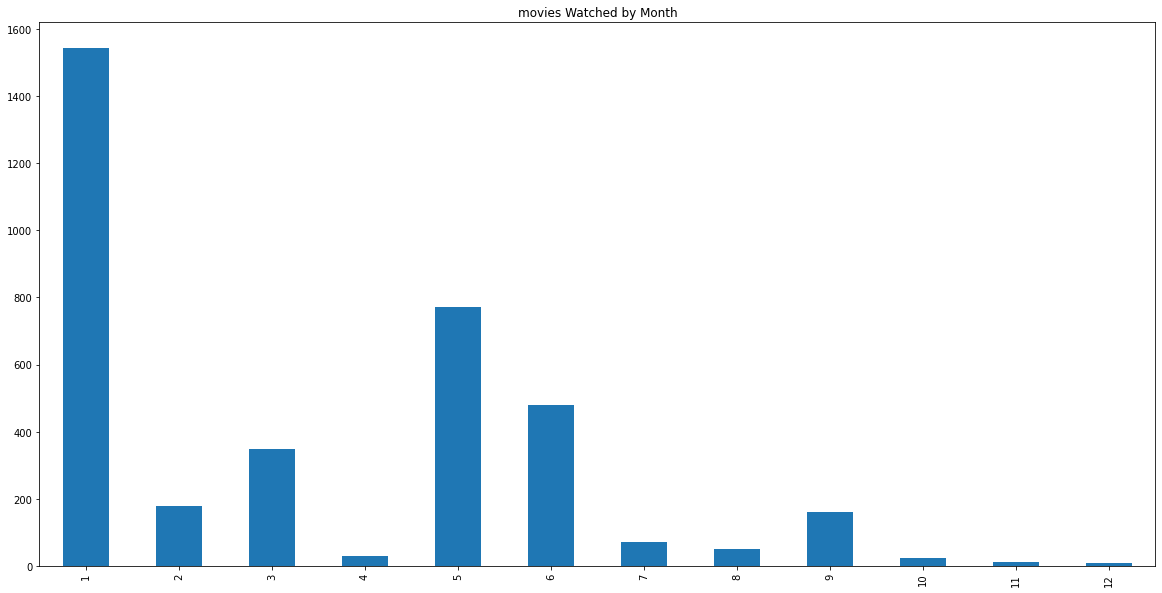

In [53]:
movies_by_month = tags['month'].value_counts()

movies_by_month = movies_by_month.sort_index()


movies_by_month.plot(kind='bar', figsize=(20,10), title='movies Watched by Month')

<AxesSubplot:title={'center':'movies Watched by Year'}>

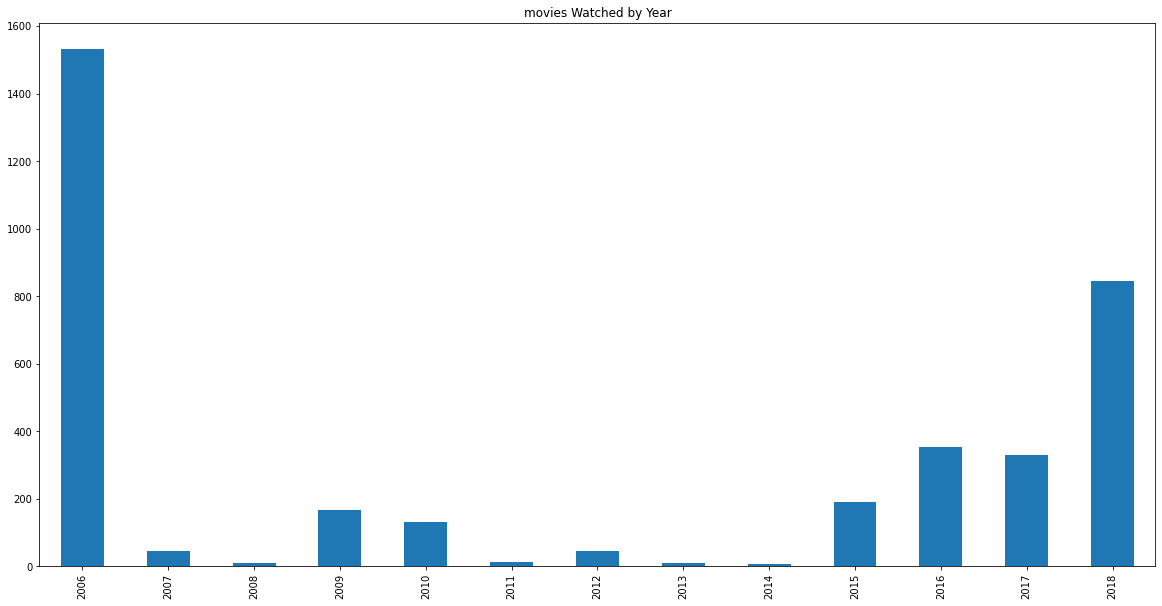

In [54]:
movies_by_year = tags['year'].value_counts()

movies_by_year = movies_by_year.sort_index()


movies_by_year.plot(kind='bar', figsize=(20,10), title='movies Watched by Year')

In [55]:
tags.describe()

,userId,movieId,day,month,year,hour,week day
count,3683.000000,3683.000000,3683.000000,3683.000000,3683.000000,3683.000000,3683.000000
mean,431.149335,27252.013576,14.865870,3.437958,2011.588651,11.806679,2.593809
std,158.472553,43490.558803,8.020915,2.553000,5.313215,7.915914,2.250013
min,2.000000,1.000000,1.000000,1.000000,2006.000000,0.000000,0.000000
25%,424.000000,1262.500000,10.000000,1.000000,2006.000000,3.000000,0.000000
50%,474.000000,4454.000000,14.000000,3.000000,2010.000000,16.000000,2.000000
75%,477.000000,39263.000000,23.000000,5.000000,2017.000000,18.000000,5.000000
max,610.000000,193565.000000,31.000000,12.000000,2018.000000,23.000000,6.000000


In [56]:
tags["userId"].value_counts()

474    1507
567     432
62      370
599     323
477     280
424     273
537     100
125      48
357      45
318      41
184      35
573      31
193      20
18       16
119      14
336      10
2         9
305       8
606       7
327       7
166       6
419       5
356       5
462       5
103       5
132       4
291       4
21        4
435       4
289       4
226       3
205       3
509       3
487       3
319       3
439       3
177       3
49        3
506       3
112       3
610       3
533       3
513       3
106       2
76        2
138       2
63        2
256       2
341       2
520       2
274       1
288       1
167       1
600       1
161       1
7         1
543       1
300       1
Name: userId, dtype: int64

In [57]:
ratings = convert_timestamp(ratings)
ratings

,userId,movieId,rating,day,month,year,hour,week day
0,1,1,4.0,30,7,2000,18,6
1,1,3,4.0,30,7,2000,18,6
2,1,6,4.0,30,7,2000,18,6
3,1,47,5.0,30,7,2000,19,6
4,1,50,5.0,30,7,2000,18,6
...,...,...,...,...,...,...,...,...
100831,610,166534,4.0,3,5,2017,21,2
100832,610,168248,5.0,3,5,2017,22,2
100833,610,168250,5.0,8,5,2017,19,0
100834,610,168252,5.0,3,5,2017,21,2


In [58]:
title = []
link = []
genres = []

for Id in ratings["movieId"]:
    movie_name = movies[movies["movieId"] == Id]["title"]
    title.append(movie_name.values[0])
    
    movie_links = links[links["movieId"] == Id]["imdbId"]
    link.append("www.imdb.com/title/tt" + str(movie_links.values[0]))
    
    movie_genres = movies[movies["movieId"] == Id]["genres"]
    genres.append(movie_genres.values[0])
    
ratings["title"] = title
ratings["link"] = link
ratings["genres"] = genres

In [59]:
ratings

,userId,movieId,rating,day,month,year,hour,week day,title,link,genres
0,1,1,4.0,30,7,2000,18,6,Toy Story (1995),www.imdb.com/title/tt114709,Adventure|Animation|Children|Comedy|Fantasy
1,1,3,4.0,30,7,2000,18,6,Grumpier Old Men (1995),www.imdb.com/title/tt113228,Comedy|Romance
2,1,6,4.0,30,7,2000,18,6,Heat (1995),www.imdb.com/title/tt113277,Action|Crime|Thriller
3,1,47,5.0,30,7,2000,19,6,Seven (a.k.a. Se7en) (1995),www.imdb.com/title/tt114369,Mystery|Thriller
4,1,50,5.0,30,7,2000,18,6,"Usual Suspects, The (1995)",www.imdb.com/title/tt114814,Crime|Mystery|Thriller
...,...,...,...,...,...,...,...,...,...,...,...
100831,610,166534,4.0,3,5,2017,21,2,Split (2017),www.imdb.com/title/tt4972582,Drama|Horror|Thriller
100832,610,168248,5.0,3,5,2017,22,2,John Wick: Chapter Two (2017),www.imdb.com/title/tt4425200,Action|Crime|Thriller
100833,610,168250,5.0,8,5,2017,19,0,Get Out (2017),www.imdb.com/title/tt5052448,Horror
100834,610,168252,5.0,3,5,2017,21,2,Logan (2017),www.imdb.com/title/tt3315342,Action|Sci-Fi


In [60]:
ratings.to_csv(r'/home/mohammad/movie_recommendation.csv', index = False)

In [40]:
avg_rating = ratings.groupby('title').rating.sum()/ratings.groupby('title').rating.count()
avg_rating.sort_values(ascending = False)

title
Karlson Returns (1970)                           5.0
Winter in Prostokvashino (1984)                  5.0
My Love (2006)                                   5.0
Sorority House Massacre II (1990)                5.0
Winnie the Pooh and the Day of Concern (1972)    5.0
                                                ... 
The Beast of Hollow Mountain (1956)              0.5
Follow Me, Boys! (1966)                          0.5
The Butterfly Effect 3: Revelations (2009)       0.5
The Emoji Movie (2017)                           0.5
Rust and Bone (De rouille et d'os) (2012)        0.5
Name: rating, Length: 9719, dtype: float64

In [41]:
ratings.describe()

,userId,movieId,rating,day,month,year,hour,week day
count,100836.000000,100836.000000,100836.000000,100836.000000,100836.000000,100836.000000,100836.000000,100836.000000
mean,326.127564,19435.295718,3.501557,15.854367,6.413811,2007.722936,12.609167,2.865256
std,182.618491,35530.987199,1.042529,8.808642,3.400786,6.890376,7.337549,2.094230
min,1.000000,1.000000,0.500000,1.000000,1.000000,1996.000000,0.000000,0.000000
25%,177.000000,1199.000000,3.000000,8.000000,4.000000,2002.000000,6.000000,1.000000
50%,325.000000,2991.000000,3.500000,16.000000,6.000000,2007.000000,14.000000,3.000000
75%,477.000000,8122.000000,4.000000,23.000000,9.000000,2015.000000,19.000000,5.000000
max,610.000000,193609.000000,5.000000,31.000000,12.000000,2018.000000,23.000000,6.000000


In [42]:
links

,movieId,imdbId,tmdbId
0,1,114709,862.0
1,2,113497,8844.0
2,3,113228,15602.0
3,4,114885,31357.0
4,5,113041,11862.0
...,...,...,...
9737,193581,5476944,432131.0
9738,193583,5914996,445030.0
9739,193585,6397426,479308.0
9740,193587,8391976,483455.0
